# Máquinas de soporte vectorial
Las máquinas de soporte vectorial (support vector machines o SVM) son conocidas sobre todo para problemas de clasificación. Sin embargo, los fundamentos también se pueden utilizar para problemas de regresión. En este caso, los modelos se denominan SVR (del inglés support vector regression). El punto clave de las máquinas de soporte vectorial es el concepto de cambiar de un espacio original a uno de mayor dimensión, donde el problema es más sencillo de resolver. Esto se conoce como el kernel trick, ya que se utiliza una función Kernel que hace esa transformación.

Un buen artículo sobre funciones KERNEL se encuentra acá https://towardsdatascience.com/kernel-function-6f1d2be6091

Las máquinas de soporte vectorial en regresión tienen la flexibilidad de dejar definir cuánto error (épsilon) es aceptable en el modelo y encontrar la línea (o hiperplano para dimensiones más altas) que se ajuste lo mejor posible a los datos. El objetivo del modelo es minimizar los coeficientes sujetos a una restricción. El término de error es tratado en la restricción.

In [2]:
# Librerias
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

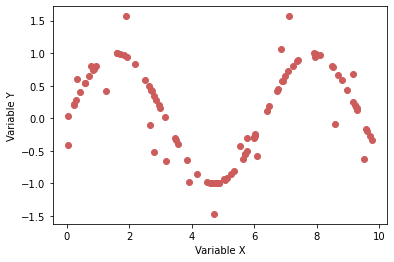

In [3]:
# Generar una muestra
X = np.sort(10 * np.random.rand(100,1), axis = 0)
y = np.sin(X).ravel()

# añadir ruido
y[::5] += 2 * (0.5 - np.random.rand(20))

plt.scatter(X, y, color = "indianred")
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

En el siguiente código se generan tres modelos diferentes: uno con un `kernel rbf`, otro con `kernel lineal` y otro con `kernel polinómico de grado 3`.

Se ajustan los distintos modelos a los datos y se representan las predicciones obtenidas. Con lo que se muestra en la figura, los datos siguen una forma no lineal, por lo que, previsiblemente, el kernel lineal no se comporte correctamente. 

In [4]:
# Ajuste del modelo de regressión
svr_rbf = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel = 'linear', C=100, gamma='auto')
svr_poly = SVR(kernel = 'poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

Text(0.5, 0.98, 'Support Vector Regression')

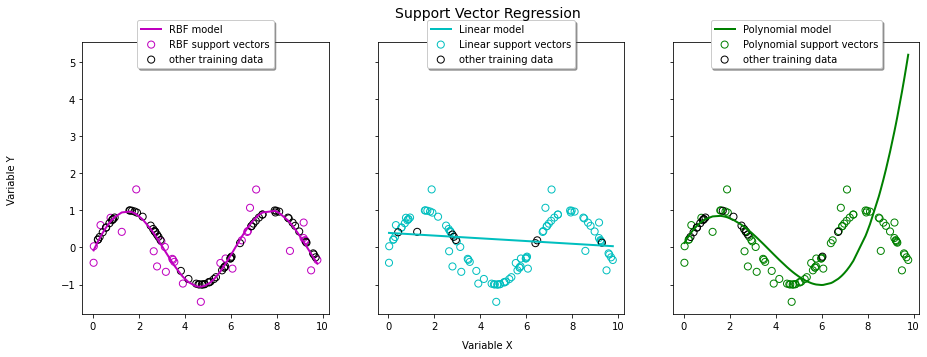

In [7]:
# Análisis de los resultados
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5), sharey=True)

for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw, label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor='none', edgecolor=model_color[ix], s=50, label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)], y[np.setdiff1d(np.arange(len(X)), svr.support_)], facecolor='none', edgecolor='k', s=50, label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5,1.1), ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'Variable X', ha='center', va='center')
fig.text(0.06, 0.5, 'Variable Y', ha='center', va='center', rotation='vertical')
fig.suptitle('Support Vector Regression', fontsize=14)

Por lo que se muestra en la figura, se cumple lo que se preveía, el kernel lineal tiene un mal rendimiento en estos datos. El kernel polinómico de grado tres en una parte de los datos se ajusta correctamente y en otra, no. Por último, el kernel **rbf o gaussiano** se ajusta muy bien a los datos en toda la forma. Como norma general, se debería utilizar el kernel rbf, ya que se ajusta correctamente a casi cualquier función.